<a href="https://colab.research.google.com/github/alvarengaricardo/classificador/blob/main/Live_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapas do projeto:

**1) Definindo o problema**

**2) Preparando os dados**

**3) Avaliando Modelos**

**4) Finalizando o Modelo**

# 1) Definindo o problema

O time de RH precisa identificar possíveis demissionários para propor algumas medidas para reter as pessoas mais importantes. O desafio agora é criar um modelo preditivo que possa identificar quais são os colaboradores que podem deixar a empresa.

## Antes de iniciar, vamos explorar os dados que serão trabalhados

In [ ]:
import pandas as pd

#carregando o csv em um DataFrame usando a biblioteca Pandas
df = pd.read_csv('rh.csv')

#Exibe as primeiras linhas do dataframe
df.head()

,codigo,idade,departamento,escolaridade,sexo,nivel,funcao,est_civil,salario,horas_trab,total_tempo_trab,cursos_ultimo_ano,tempo_empresa,tempo_funcao,ultima_promocao,tempo_gerente_atual,deixou_a_empresa
0,1,41,Vendas,2,F,2,Executivo de Vendas,Solteiro(a),5993,80,8,0,6,4,0,5,S
1,2,49,P&D,1,M,2,Pesquisador,Casado(a),5130,80,10,3,10,7,1,7,N
2,4,37,P&D,2,M,1,Tecnico de Laboratorio,Solteiro(a),2090,80,7,3,0,0,0,0,S
3,5,33,P&D,4,F,1,Pesquisador,Casado(a),2909,80,8,3,8,7,3,0,N
4,7,27,P&D,1,M,1,Tecnico de Laboratorio,Casado(a),3468,80,6,3,2,2,2,2,N


In [ ]:
#Recuperando informações sobre o dataset (df.info())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codigo               1470 non-null   int64 
 1   idade                1470 non-null   int64 
 2   departamento         1470 non-null   object
 3   escolaridade         1470 non-null   int64 
 4   sexo                 1470 non-null   object
 5   nivel                1470 non-null   int64 
 6   funcao               1470 non-null   object
 7   est_civil            1470 non-null   object
 8   salario              1470 non-null   int64 
 9   horas_trab           1470 non-null   int64 
 10  total_tempo_trab     1470 non-null   int64 
 11  cursos_ultimo_ano    1470 non-null   int64 
 12  tempo_empresa        1470 non-null   int64 
 13  tempo_funcao         1470 non-null   int64 
 14  ultima_promocao      1470 non-null   int64 
 15  tempo_gerente_atual  1470 non-null   int64 
 16  deixou

In [ ]:
#Mostra as dimençõs do dataset (df.shape)
df.shape

(1470, 17)

In [ ]:
#Checando missing e duplicados

#Quantidade de missings ou nulos por coluna
print('Missing por coluna')
print(df.isnull().sum())

print('\nQualquer missing no dataset')
print(df.isnull().sum().any())

print('\nMatriz com valores nulos')
print(df.isnull())

Missing por coluna
codigo                 0
idade                  0
departamento           0
escolaridade           0
sexo                   0
nivel                  0
funcao                 0
est_civil              0
salario                0
horas_trab             0
total_tempo_trab       0
cursos_ultimo_ano      0
tempo_empresa          0
tempo_funcao           0
ultima_promocao        0
tempo_gerente_atual    0
deixou_a_empresa       0
dtype: int64

Qualquer missing no dataset
False

Matriz com valores nulos
      codigo  idade  departamento  escolaridade   sexo  nivel  funcao  \
0      False  False         False         False  False  False   False   
1      False  False         False         False  False  False   False   
2      False  False         False         False  False  False   False   
3      False  False         False         False  False  False   False   
4      False  False         False         False  False  False   False   
...      ...    ...           ...           

In [ ]:
#Validando redundancia entre linhas (linhas duplicadas)
print('\nExistência de linhas duplicadas')
print(df.duplicated().any())

#Se existisse, poderia ser usado o comando
#df.drop_duplicates(inplace=True)


Existência de linhas duplicadas
False


In [ ]:
#Descrevendo o dataset (describe())
df.describe()

,codigo,idade,escolaridade,nivel,salario,horas_trab,total_tempo_trab,cursos_ultimo_ano,tempo_empresa,tempo_funcao,ultima_promocao,tempo_gerente_atual
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,2.912925,2.063946,6502.931293,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,602.024335,9.135373,1.024165,1.106940,4707.956783,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,1.000000,1.000000,1009.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,30.000000,2.000000,1.000000,2911.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,36.000000,3.000000,2.000000,4919.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,43.000000,4.000000,3.000000,8379.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,60.000000,5.000000,5.000000,19999.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#Mostra o nome das colunas (columns)
df.columns

Index(['codigo', 'idade', 'departamento', 'escolaridade', 'sexo', 'nivel',
       'funcao', 'est_civil', 'salario', 'horas_trab', 'total_tempo_trab',
       'cursos_ultimo_ano', 'tempo_empresa', 'tempo_funcao', 'ultima_promocao',
       'tempo_gerente_atual', 'deixou_a_empresa'],
      dtype='object')

## Gerando algumas visualizações

<AxesSubplot:ylabel='Frequency'>

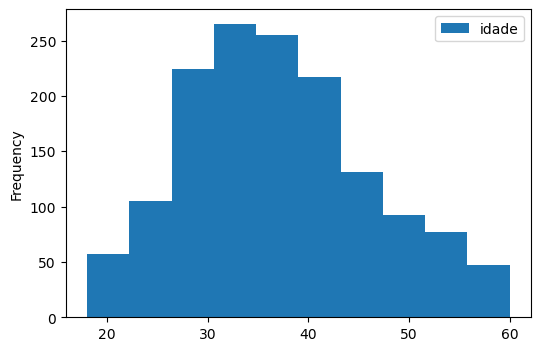

In [ ]:
#Gerando algumas visualizações
%matplotlib inline
from matplotlib import pyplot as plt

df.plot.hist(column=['idade'], figsize=(6, 4), range=[18,60])

<AxesSubplot:ylabel='Frequency'>

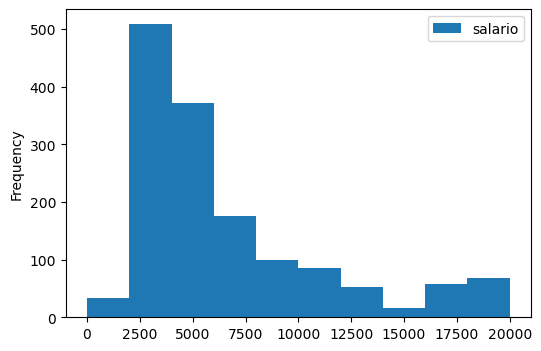

In [ ]:
#Histograma de salário

df.plot.hist(column=['salario'], figsize=(6, 4))

Text(0, 0.5, 'Proporção de empregados')

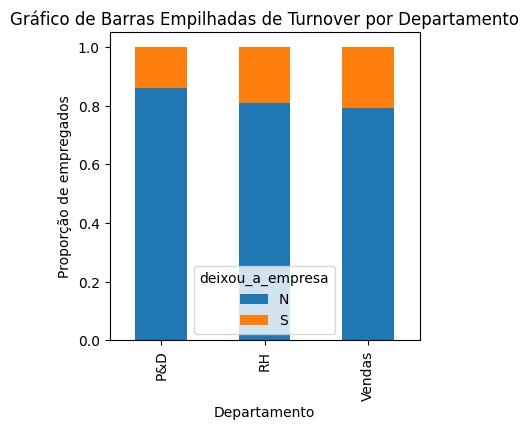

In [ ]:
#visualizando a proporção de turnover por departamento
table=pd.crosstab(df.departamento, df.deixou_a_empresa)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4, 4))
plt.title('Gráfico de Barras Empilhadas de Turnover por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Proporção de empregados')

[None, None, None, None, None, None, None, None, None, None, None, None]

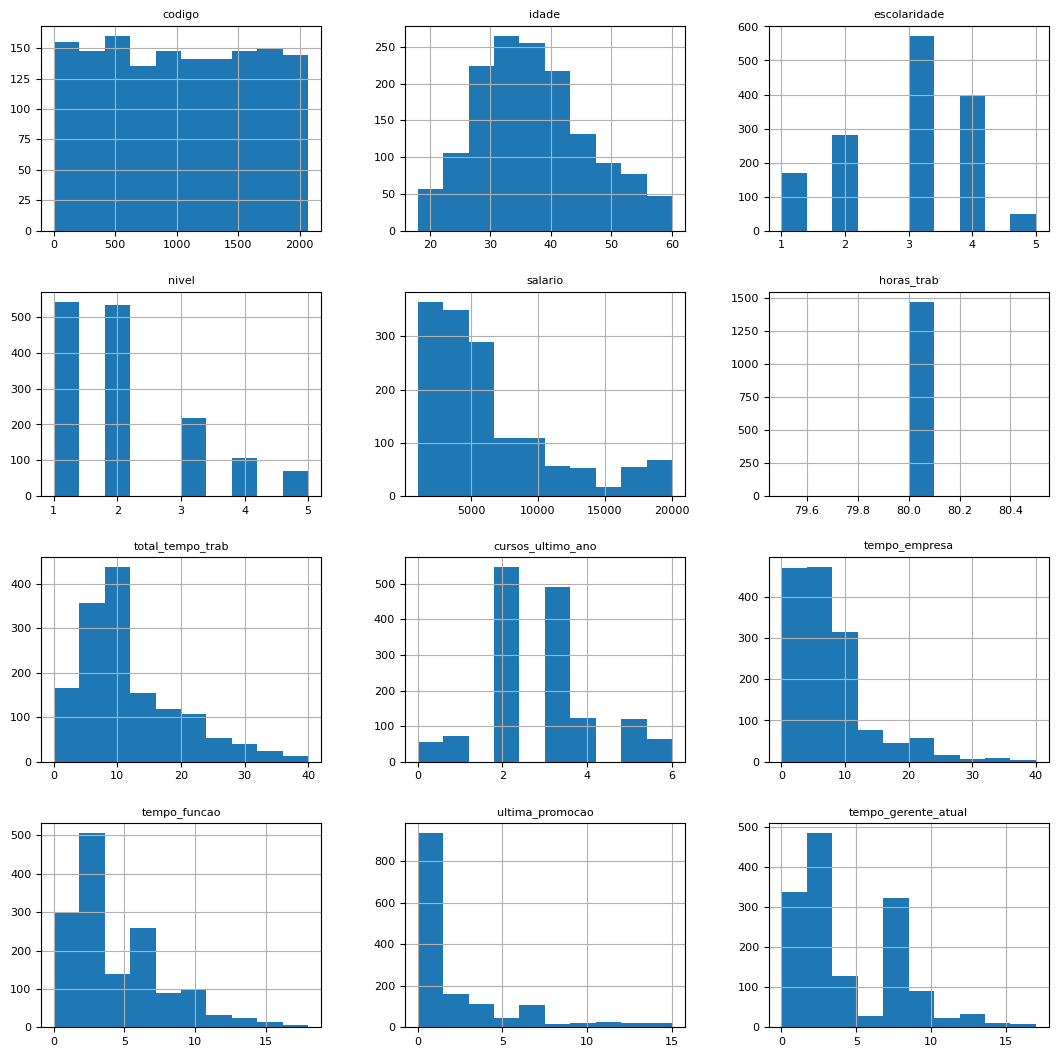

In [ ]:
#Plotar o histograma de todas as colunas numéricas

fig = df.hist(xlabelsize=8, ylabelsize=8, figsize=(13, 13))

#Exemplo ajustando os titulos de todos os graficos
[x.title.set_size(8) for x in fig.ravel()]

### Tópico extra!
### Trabalhando com AutoReports - Exploratory Data Analysis (EDA)

In [ ]:
#Instalando as bibliotecas necessárias no notebook
#import sys
#!{sys.executable} -m pip install ydata_profiling ipywidgets

In [ ]:
#from ydata_profiling import ProfileReport, compare

#Comparar os dados de quem sai com quem fica
#df_sai = df[df['deixou_a_empresa'] == 'S']
#df_fica = df[df['deixou_a_empresa'] == 'N']

#prof_sai = ProfileReport(df=df_sai, title='Saiu')
#prof_fica = ProfileReport(df=df_fica, title='Ficou')

# Faz a comparação de 3 dataframes
# prof_total = ProfileReport(df=df, title='Total')
# comparative_report = compare([prof_total, prof_sai, prof_fica])

#comparative_report = prof_fica.compare(prof_sai)

# Obtain merged statistics
# statistics = comparison_report.get_description()

# Abre o relatório
#comparative_report.to_notebook_iframe()

# 2) Preparando os dados

In [ ]:
#Verificando os valores únicos de cada coluna (nunique())
df.nunique()

codigo                 1470
idade                    43
departamento              3
escolaridade              5
sexo                      2
nivel                     5
funcao                    9
est_civil                 3
salario                1349
total_tempo_trab         40
cursos_ultimo_ano         7
tempo_empresa            37
tempo_funcao             19
ultima_promocao          16
tempo_gerente_atual      18
deixou_a_empresa          2
dtype: int64

In [ ]:
#Segundo Kuhn e Johnson (Feature Engineering and Selection), colunas com zero variância (valor único) já podem ser removidas do dataset

#Armazena os únicos em uma variável e percorre recuperando as colunas que possuem valores iguais a 1
counts = df.nunique()
to_del = [df.columns[i] for i,v in enumerate(counts) if v == 1]

#Imprime as colunas que serão excluídas
print("Excluir colunas: ", end='')
for i in to_del:
    print(i, end='')
print('')

Excluir colunas: 


In [ ]:
#Exclui as colunas desnecessárias - com valor único
print("Shape anterior: "+ str(df.shape))
df.drop(to_del, axis=1, inplace=True)
print('Novo shape: '+ str(df.shape))
df.head()

Shape anterior: (1470, 16)
Novo shape: (1470, 16)


,codigo,idade,departamento,escolaridade,sexo,nivel,funcao,est_civil,salario,total_tempo_trab,cursos_ultimo_ano,tempo_empresa,tempo_funcao,ultima_promocao,tempo_gerente_atual,deixou_a_empresa
0,1,41,Vendas,2,F,2,Executivo de Vendas,Solteiro(a),5993,8,0,6,4,0,5,S
1,2,49,P&D,1,M,2,Pesquisador,Casado(a),5130,10,3,10,7,1,7,N
2,4,37,P&D,2,M,1,Tecnico de Laboratorio,Solteiro(a),2090,7,3,0,0,0,0,S
3,5,33,P&D,4,F,1,Pesquisador,Casado(a),2909,8,3,8,7,3,0,N
4,7,27,P&D,1,M,1,Tecnico de Laboratorio,Casado(a),3468,6,3,2,2,2,2,N


In [ ]:
#Exclui também a coluna código de usuário por nao ter relevância para a analise - isso é análise de negócio!!
df.drop('codigo', axis=1, inplace=True)

print('Novo shape: '+ str(df.shape))
df.head()

Novo shape: (1470, 15)


,idade,departamento,escolaridade,sexo,nivel,funcao,est_civil,salario,total_tempo_trab,cursos_ultimo_ano,tempo_empresa,tempo_funcao,ultima_promocao,tempo_gerente_atual,deixou_a_empresa
0,41,Vendas,2,F,2,Executivo de Vendas,Solteiro(a),5993,8,0,6,4,0,5,S
1,49,P&D,1,M,2,Pesquisador,Casado(a),5130,10,3,10,7,1,7,N
2,37,P&D,2,M,1,Tecnico de Laboratorio,Solteiro(a),2090,7,3,0,0,0,0,S
3,33,P&D,4,F,1,Pesquisador,Casado(a),2909,8,3,8,7,3,0,N
4,27,P&D,1,M,1,Tecnico de Laboratorio,Casado(a),3468,6,3,2,2,2,2,N


In [ ]:
#Verifica informações dos tipos de dados existentes (info())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   idade                1470 non-null   int64 
 1   departamento         1470 non-null   object
 2   escolaridade         1470 non-null   int64 
 3   sexo                 1470 non-null   object
 4   nivel                1470 non-null   int64 
 5   funcao               1470 non-null   object
 6   est_civil            1470 non-null   object
 7   salario              1470 non-null   int64 
 8   total_tempo_trab     1470 non-null   int64 
 9   cursos_ultimo_ano    1470 non-null   int64 
 10  tempo_empresa        1470 non-null   int64 
 11  tempo_funcao         1470 non-null   int64 
 12  ultima_promocao      1470 non-null   int64 
 13  tempo_gerente_atual  1470 non-null   int64 
 14  deixou_a_empresa     1470 non-null   object
dtypes: int64(10), object(5)
memory usage: 143.6+ KB


### Transformações

In [ ]:
#Antes de realizar algumas transformações, vamos separar o xy de nosso dataframe
X, y = df.drop('deixou_a_empresa', axis=1), df['deixou_a_empresa']

print(X.shape, y.shape)

(1470, 14) (1470,)


In [ ]:
#Vamos transformar nossa saída y de S/N em números utilizando o LabelEncoder

from sklearn.preprocessing import LabelEncoder

lab_encoder = LabelEncoder()

y = lab_encoder.fit_transform(y.astype('str'))
print(lab_encoder.classes_)
print(y)

['N' 'S']
[1 0 1 ... 0 0 0]


In [ ]:
#Se quisermos saber o significado de cada encoder utilizamos a função inverse_transform
lab_encoder.inverse_transform([1])

array(['S'], dtype=object)

In [ ]:
#Agora vamos verificar os tipos existentes em nosso X
X.dtypes

idade                   int64
departamento           object
escolaridade            int64
sexo                   object
nivel                   int64
funcao                 object
est_civil              object
salario                 int64
total_tempo_trab        int64
cursos_ultimo_ano       int64
tempo_empresa           int64
tempo_funcao            int64
ultima_promocao         int64
tempo_gerente_atual     int64
dtype: object

In [ ]:
#Vamos analizar outras colunas com pouca variância
#Elas geralmente sao categoricas (contém texto/rótulos) ou podem ser ordinais (quando representam ordem/intervalos),
#podendo ser úteis ou nao para os modelos.

low_var = []

#DataFrame nunique retorna Pandas.Series
serie = df.nunique()

#Lista variaveis com menos de 1% de unicos em relacao ao dataset
for i in range(df.shape[1]):
    num = serie[i]
    perc = float(num) / df.shape[0] * 100
    if perc < 1:
        print('%d. %s, %s, Unq: %d, Perc: %.1f%%' % (i, df.columns[i], str(df[df.columns[i]].dtype), num, perc))
        low_var.append(df.columns[i])

df[low_var]

1. departamento, object, Unq: 3, Perc: 0.2%
2. escolaridade, int64, Unq: 5, Perc: 0.3%
3. sexo, object, Unq: 2, Perc: 0.1%
4. nivel, int64, Unq: 5, Perc: 0.3%
5. funcao, object, Unq: 9, Perc: 0.6%
6. est_civil, object, Unq: 3, Perc: 0.2%
9. cursos_ultimo_ano, int64, Unq: 7, Perc: 0.5%
14. deixou_a_empresa, object, Unq: 2, Perc: 0.1%


,departamento,escolaridade,sexo,nivel,funcao,est_civil,cursos_ultimo_ano,deixou_a_empresa
0,Vendas,2,F,2,Executivo de Vendas,Solteiro(a),0,S
1,P&D,1,M,2,Pesquisador,Casado(a),3,N
2,P&D,2,M,1,Tecnico de Laboratorio,Solteiro(a),3,S
3,P&D,4,F,1,Pesquisador,Casado(a),3,N
4,P&D,1,M,1,Tecnico de Laboratorio,Casado(a),3,N
...,...,...,...,...,...,...,...,...
1465,P&D,2,M,2,Tecnico de Laboratorio,Casado(a),3,N
1466,P&D,1,M,3,Representante de Saude,Casado(a),5,N
1467,P&D,3,M,2,Diretor de Manufatura,Casado(a),0,N
1468,Vendas,3,M,2,Executivo de Vendas,Casado(a),3,N


In [ ]:
#Para as variáveis categóricas podemos usar uma das 3 estratégias de encoder:
#Ordinal - quando existe relação ordinal
#One-Hot - quando não existe relação ordinal e todos os valores devem ser representados por binários
#Dummy - quando não existe relação ordinal e um dos valores pode ser o "dummy", ou seja, representado pelo vetor zero

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

#Como os numericos das colunas de baixa variancia já estão ordinais, basta ajustar a escala a partir da normalizacao entre 0-1 com MinMaxScaler
numerical_ix = X.select_dtypes(include=['int64']).columns
categorical_ix = X.select_dtypes(include=['object']).columns

#Define a transformacao
t = [('categ', OneHotEncoder(sparse_output=False), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
# t = [('categ', OneHotEncoder(sparse_output=False), categorical_ix)]

#Cria o objeto de transformacao e mantem as colunas ignoradas com passthrough
col_transform = ColumnTransformer(transformers=t, remainder='passthrough')

In [ ]:
#Executa a transformação das colunas
X_trans = col_transform.fit_transform(X)
print(col_transform.get_feature_names_out)
print(X_trans[0])

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('categ', OneHotEncoder(sparse_output=False),
                                 Index(['departamento', 'sexo', 'funcao', 'est_civil'], dtype='object')),
                                ('num', MinMaxScaler(),
                                 Index(['idade', 'escolaridade', 'nivel', 'salario', 'total_tempo_trab',
       'cursos_ultimo_ano', 'tempo_empresa', 'tempo_funcao', 'ultima_promocao',
       'tempo_gerente_atual'],
      dtype='object'))])>
[0.         0.         1.         1.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.54761905
 0.25       0.25       0.26245392 0.2        0.         0.15
 0.22222222 0.         0.29411765]


## 3) Avaliando modelos

In [ ]:

from sklearn.metrics import precision_score, accuracy_score
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
#Dividindo em treino e teste
from sklearn.model_selection import train_test_split

teste = df['deixou_a_empresa'].value_counts()
prop_original = teste[1]/teste[0]

for i in range(10):
    #O hiperparâmetro stratify ajusta a divisão para a mesma proporção original
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.33, random_state=33)

    n_razao = np.unique(y_train, return_counts=True)
    print(f'Original {prop_original} | Novo: {n_razao[1][1]/n_razao[1][0]}')


for i in range(10):
    #O hiperparâmetro stratify ajusta a divisão para a mesma proporção original
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.33, random_state=33, stratify=y)

    n_razao = np.unique(y_train, return_counts=True)
    print(f'Original {prop_original} | Novo: {n_razao[1][1]/n_razao[1][0]}')


<class 'NameError'>: name 'np' is not defined

In [ ]:
# solvers = [->'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
model = LogisticRegression()
model.fit(X_train, y_train)

# Avaliacao do modelo
y_pred = model.predict(X_test)

# Analise dos preditores
precision = precision_score(y_test, y_pred)
acuracy = accuracy_score(y_test, y_pred)

print('Precision: %.2f' % (precision*100))
print('Accuracy: %.2f' % (acuracy*100))

Precision: 100.00
Accuracy: 82.51


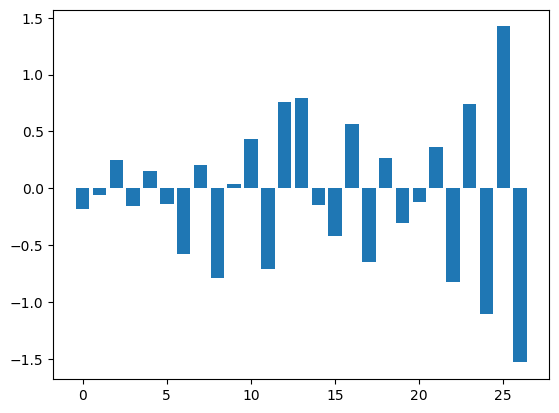

In [ ]:
#Uma pergunta recorrente é "quais variáveis influenciam em cada aspecto"

importance = model.coef_[0]

# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
#Transformando as colunas usando pandas


In [ ]:
#Tente em um modelo de Regressão Logística - que é um modelo sensível ao tipo de dados!
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from numpy import absolute
from numpy import std
from numpy import mean

# define the model
model = LogisticRegression()

# define the model cross-validation configuration
cv = StratifiedKFold(n_splits=8, random_state=1, shuffle=True)
scoring = ['accuracy', 'precision','neg_mean_absolute_error']

# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep', col_transform), ('m', model)])

#Aqui estou usando X original pois a propria pipeline faz a transformação
scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)

pres = scores['test_precision']
accur = scores['test_accuracy']
mae = absolute(scores['test_neg_mean_absolute_error'])

# Imprime os resultados
print('Precision: %.3f (%.3f)' % (mean(pres), std(pres)))
print('Accuracy: %.3f (%.3f)' % (mean(accur), std(accur)))
print('MAE: %.3f (%.3f)' % (mean(mae), std(mae))) #buscamos o 0.0 de loss




Precision: 0.738 (0.116)
Accuracy: 0.849 (0.007)
MAE: 0.151 (0.007)


[Text(0.5, 1.0, 'Matriz Confusão'),
 Text(0.5, 0, 'Predito'),
 Text(0, 0.5, 'Atual')]

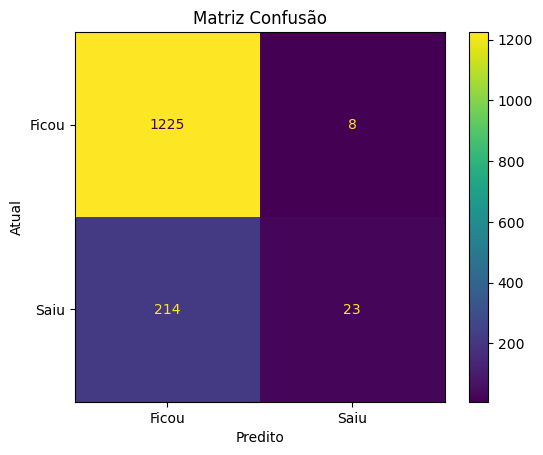

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(pipeline, X, y, cv=cv)

cm = confusion_matrix(y, y_pred)
cm_obj = ConfusionMatrixDisplay(cm, display_labels=['Ficou', 'Saiu'])

cm_obj.plot()
cm_obj.ax_.set(
                title='Matriz Confusão',
                xlabel='Predito',
                ylabel='Atual')
